# Práctica 4: Clasificador de Bayes
Hacemos un clasificador de bayes para poder encontrar una prostata, su halo y el fondo del ultrasonido de forma automática. 

In [112]:
# Importamos la librerias que vamos a utilzar en la práctica
import cv2
import os
import numpy as np
import math

from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join

## Carga de Imagenes
Cargamos las imagenes cortadas en tres secciones previamente:
1. Prostata: tiene la seccion del ultrasonido que tiene la prostata.
2. Halo: Carga el halo del utrasonido el cual es tejido que rodea la prostata.
3. Fondo: 

In [113]:
# Creamos tres listas en las que vamos a guardar las matrices de los ultrasonidos. 

prostatas = []
halos = []
fondos = []

mypath = (os.getcwd() + r'/imagenes/')

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# Buscamos entre las imagenes las que sean de prostata, halo o fondo y se asignan a
# la lista de imagenes a las que corresponden 

for file in onlyfiles:
    if "prost" in file:
        img = cv2.imread(mypath + file,0)
        temp = gaussian_3 = cv2.GaussianBlur(img, (9,9), 5.0)
        prostatas.append(temp)
    elif "halo" in file:
        img = cv2.imread(mypath + file,0)
        temp = gaussian_3 = cv2.GaussianBlur(img, (9,9), 5.0)
        halos.append(temp)
    elif "fondo" in file:
        img = cv2.imread(mypath + file,0)
        temp = gaussian_3 = cv2.GaussianBlur(img, (9,9), 5.0)
        fondos.append(temp)

In [114]:

def getMedian(lista):
    media_imagenes = 0
    media_x =0
    media_y =0
    vect_res = []
    for imagen in lista:
        alto = imagen.shape[0]
        largo = imagen.shape[1]
        vectores_imagen = []
        sumx = 0
        sumy = 0
        suma = 0
        cont = 0
        for i in range(alto):
            
            for j in range(largo):
                if imagen[i][j] > 0:
                    vec = []
                    sumx += i
                    sumy += j
                    suma += imagen[i][j]
                    vec.append(imagen[i][j])
                    vec.append(i)
                    vec.append(j)
                    vectores_imagen.append(vec)
                    
                    cont += 1
        
        media_y += sumy/cont
        media_x += sumx/cont
        media_imagenes += suma/cont
       
        
        vectores_parte.append(vectores_imagen)
        
    vec_medio =[media_x/len(lista),media_y/len(lista),media_imagenes/len(lista)]
    media.append(vec_medio)
                
    

In [115]:
media = []
vectores_parte = []

# Obtenemos la media de los grupos de imagenes. 
getMedian(prostatas)
getMedian(halos)
getMedian(fondos)

In [116]:
print("Media de Prostata: {0}\nMedia de Halo: {1}\nMedia de Fondo: {2}".format(media[0],media[1],media[2]))

Media de Prostata: [115.17783128146681, 123.02165734874684, 59.420810299959726]
Media de Halo: [218.233958317913, 224.0592296599386, 79.943116566213291]
Media de Fondo: [196.44478756615277, 258.23178558042434, 46.004277306619137]


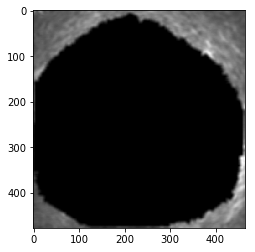

In [117]:
plt.imshow(fondos[2], cmap='gray')
plt.show()

## Covarianza Prostata

In [118]:
prostata_list = []

for i in range(3):
    for vector in vectores_parte[i]:
        prostata_list.append(vector)

In [119]:
print("Covarianza Prostata")
cov_pros = np.cov(prostata_list, rowvar=False)
cov_pros

Covarianza Prostata


array([[  711.74618757,   625.43033581,   172.2415675 ],
       [  625.43033581,  3922.00506736,   618.94488601],
       [  172.2415675 ,   618.94488601,  4159.39683926]])

## Covarianza Halo

In [120]:
halo_list = []

for i in range(3,6):
    for value in vectores_parte[i]:
        halo_list.append(value)

In [121]:
print("Covarianza Halo")
cov_halo = np.cov(halo_list, rowvar=False)
cov_halo

Covarianza Halo


array([[  1339.03836156,    712.77103051,    579.75435398],
       [   712.77103051,  18561.04281938,    208.85218909],
       [   579.75435398,    208.85218909,  18349.40050211]])

## Covarianza Fondo

In [122]:
fondo_list = []

for i in range(6,9):
    for value in vectores_parte[i]:
        fondo_list.append(value)

In [123]:
print("Covarianza Fondo")
cov_fondo = np.cov(fondo_list, rowvar=False)
cov_fondo

Covarianza Fondo


array([[   463.47726764,    106.95255159,    407.98453949],
       [   106.95255159,  29937.61629339,   -695.53287608],
       [   407.98453949,   -695.53287608,  27517.86297231]])

In [124]:
logetP = (1/2)*math.log(np.linalg.det(cov_pros))
logetH = (1/2)*math.log(np.linalg.det(cov_halo))
logetF = (1/2)*math.log(np.linalg.det(cov_fondo))

In [125]:
invcovP = np.linalg.inv(cov_pros)
invcovH = np.linalg.inv(cov_halo)
invcovF = np.linalg.inv(cov_fondo)

In [126]:
prostatas_array = []
halos_array = []
fondos_array = []

for img in prostatas:
    for filas in img:
        for pixel in filas:
            prostatas_array.append(pixel)
        
for img in halos:
    for filas in img:
        for pixel in filas:
            halos_array.append(pixel)

for img in fondos:
    for filas in img:
        for pixel in filas:
            fondos_array.append(pixel)


In [127]:
probP = np.count_nonzero(prostatas_array)/len(prostatas_array)
probH = np.count_nonzero(halos_array)/len(halos_array)
probF = np.count_nonzero(fondos_array)/len(fondos_array)

In [128]:
print(probF)
print(probH)
print(probP)

0.32311311513456326
0.7121512813255758
0.7905832490957142


In [149]:
def fit_tranform(imagen):
    imagen[15:460][86:531]
    

    alto = imagen.shape[0]
    largo = imagen.shape[1]
    for i in range(alto):
        for j in range(largo):
            vector=[i,j,imagen[i][j]]
            YP = -(1/2) * (np.array([i - j for i, j in zip(vector, media[0])])[np.newaxis]).T * invcovP * (np.array([i - j for i, j in zip(vector, media[0])])[np.newaxis]) - logetP + np.log(probP)
            YH = -(1/2) * (np.array([i - j for i, j in zip(vector, media[1])])[np.newaxis]).T * invcovH * (np.array([i - j for i, j in zip(vector, media[1])])[np.newaxis]) - logetP + np.log(probH)
            YF = -(1/2) * (np.array([i - j for i, j in zip(vector, media[2])])[np.newaxis]).T * invcovF * (np.array([i - j for i, j in zip(vector, media[2])])[np.newaxis]) - logetP + np.log(probF)
            print(YP)
            
            if( YP>YH):
                if(YP>YF):
                    imagen[i][j] = 250
            elif YH>YF:
                imagen[i][j] = 120
            else:
                imagen[i][j]=0
        

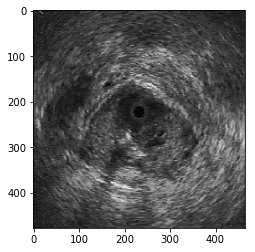

[[-22.59575183  -9.91725153 -11.70267802]
 [ -9.91725153 -14.01386001 -11.69536681]
 [-11.70267802 -11.69536681 -11.77599248]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [150]:
imagen = cv2.imread(mypath + 'U3-16-03.BMP',0)
imagen[15:460][86:531]
plt.imshow(imagen, cmap='gray')
plt.show()

fit_tranform(imagen)

In [153]:
invcovP * (np.array([i - j for i, j in zip(vector, media[0])])[np.newaxis]) - logetP + np.log(probP)

array([[-11.91946121, -11.77361813, -11.73900966],
       [-11.7051055 , -11.68774169, -11.73976049],
       [-11.73077459, -11.73939783, -11.6935222 ]])

In [145]:
((np.array([i - j for i, j in zip(vector, media[0])]))[np.newaxis]).T

array([[-113.17783128],
       [ 153.97834265],
       [ 164.5791897 ]])